# Imports:

In [1]:
import os
import sys

import numpy as np
np.set_printoptions(precision=3)

import matplotlib.pyplot as plt

# Figure Formats:

In [2]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib
import matplotlib.pylab as pylab
from matplotlib.legend import Legend

%matplotlib notebook
%matplotlib notebook

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4.5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'font.family': ['serif'],
         'font.sans-serif' : 'Computer Modern Roman',
         'grid.color': '#c1c1c1',
         'text.usetex' : 'true',
         'legend.framealpha' : '1.0',
         'lines.markersize': '7.0',
         'lines.markeredgewidth': '0.5'}
pylab.rcParams.update(params)



colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
shapes = ['X','o', 'd', 'v', '^', '<', '>', 'P', '8', 's', 'p', '*', 'h', 'H', 'D']

# Load Trajectories to Ram:

In [3]:
from utils import get_traj_list


file_path = 'traj_data.h5'
traj_list = get_traj_list(file_path)

print len(traj_list)

200


In [4]:
#get the "recording" frame rate
FPS = len(traj_list[0]) / 4.0
print FPS

37.75


# Global Velocity Statistics:

###### mean velocity and velocity moments:

In [5]:
from utils import get_mean_velocity, get_vel_p_moment



# mean velocity:
U = get_mean_velocity(traj_list)
print U


# central 2nd moment
p=2
u2 = get_vel_p_moment(traj_list, p)
print u2 


# turbulent kinetic energy
tke = np.sum(u2) * 0.5
print tke

[-0.321  0.148 -0.467]
[0.219 0.265 0.188]
0.336154580116272


###### velocity PDFs :

<IPython.core.display.Javascript object>


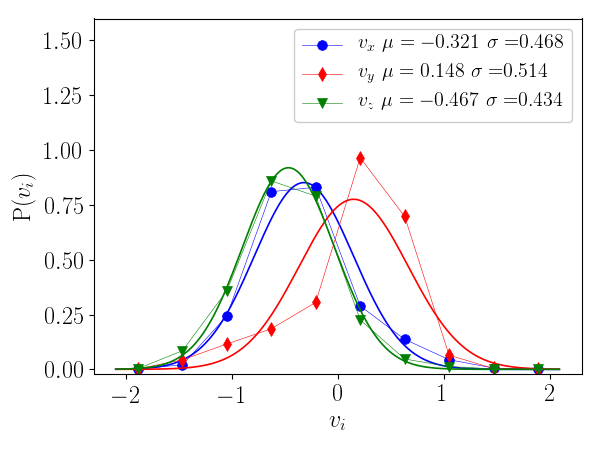

In [7]:
from utils import plot_vel_pdfs

fig, ax = plot_vel_pdfs(traj_list, fit_gaussian=True, bins=10, bin_range=None)

ax.set_ylim(-0.02,1.6)
plt.tight_layout()